# 🛍️ Project 1 – Online Retail Sales Analysis

## 🎯 Business & Project Objectives

Analyze customer transactions to understand purchasing behavior, identify the most profitable products and customers, visualize sales trends, and provide actionable business recommendations.

From a business perspective, this type of analysis can help e-commerce stakeholders:
- Identify the **top-selling products** to prioritize inventory and marketing efforts
- Detect **underperforming markets** to reconsider international strategy
- Understand **customer lifetime value (CLV)** and **segment clients** for better targeting
- Optimize **sales periods and promotions** by analyzing time-based patterns

For example, identifying that 80% of revenue comes from 20% of products (Pareto principle) could lead to **inventory optimization and cost reduction**. Spotting peak purchasing hours/days allows better **ad budget allocation** and **staffing decisions**.

This project is part of my data portfolio demonstrating both **data analysis skills** and **the ability to generate data-driven business insights** using real-world e-commerce data.

---

## 🗂️ Project Steps

**1- Choose a dataset**  
→ Online Retail Dataset (Kaggle, transactions from December 2010 to December 2011)

**2- Clean and prepare the data**  
→ Handle missing values, remove canceled transactions, correct data types, extract date/time features

**3- Perform exploratory data analysis (EDA)**  
→ Summary statistics, sales per product, sales per country, customer behavior

**4- Create data visualizations**  
→ Sales trends, top-selling products, revenue by country, hourly/daily patterns

**5- Generate insights and recommendations**  
→ Identify best customers, top products, high-performing countries, time-based purchasing patterns

**6- Document the work on GitHub**  
→ README, clean notebook, visualizations, business conclusions

**7- Build a dashboard with Power BI**

---

## 🧰 Tools & Technologies

- Python (pandas, matplotlib, seaborn)
- Jupyter Notebook
- Git & GitHub
- (Optional) Power BI / Streamlit

---

## 📦 Dataset

- **Name:** Online Retail Dataset  
- **Source:** [UCI / Kaggle](https://www.kaggle.com/datasets/carrie1/ecommerce-data)  
- **Period:** December 2010 – December 2011  
- **Size:** ~500,000 rows  
- **Data type:** Real transaction invoices from an online store in the UK


In [50]:
#  Step 1: Import libraries
import pandas as pd
import numpy as np

In [52]:
#  Step 2: Load dataset (your own file)
df = pd.read_csv("data.csv", encoding='latin1')

In [54]:
#  Step 3: Clean column names (strip and lowercase)
df.columns = df.columns.str.strip().str.lower()

In [56]:
#  Step 4: Check initial info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   invoiceno    541909 non-null  object 
 1   stockcode    541909 non-null  object 
 2   description  540455 non-null  object 
 3   quantity     541909 non-null  int64  
 4   invoicedate  541909 non-null  object 
 5   unitprice    541909 non-null  float64
 6   customerid   406829 non-null  float64
 7   country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [58]:
#  Step 5: Remove missing customerid or description
df = df.dropna(subset=['customerid', 'description'])

In [60]:
#  Step 6: Remove canceled transactions (InvoiceNo starting with 'C')
df = df[~df['invoiceno'].astype(str).str.startswith('C')]

In [62]:
#  Step 7: Convert invoicedate to datetime + create time-based columns
df['invoicedate'] = pd.to_datetime(df['invoicedate'], errors='coerce')
df['invoice_date'] = df['invoicedate'].dt.date
df['invoice_hour'] = df['invoicedate'].dt.hour
df['invoice_day'] = df['invoicedate'].dt.day_name()
df['invoice_month'] = df['invoicedate'].dt.month_name()

In [64]:
#  Check if datetime conversion failed
print("Missing dates after conversion:", df['invoicedate'].isnull().sum())

Missing dates after conversion: 0


In [66]:
#  Step 8: Create revenue column
df['revenue'] = df['quantity'] * df['unitprice']

# Check basic stats
print("Total revenue: £{:.2f}".format(df['revenue'].sum()))
print("Average basket (per invoice): £{:.2f}".format(df.groupby('invoiceno')['revenue'].sum().mean()))


Total revenue: £8911407.90
Average basket (per invoice): £480.76


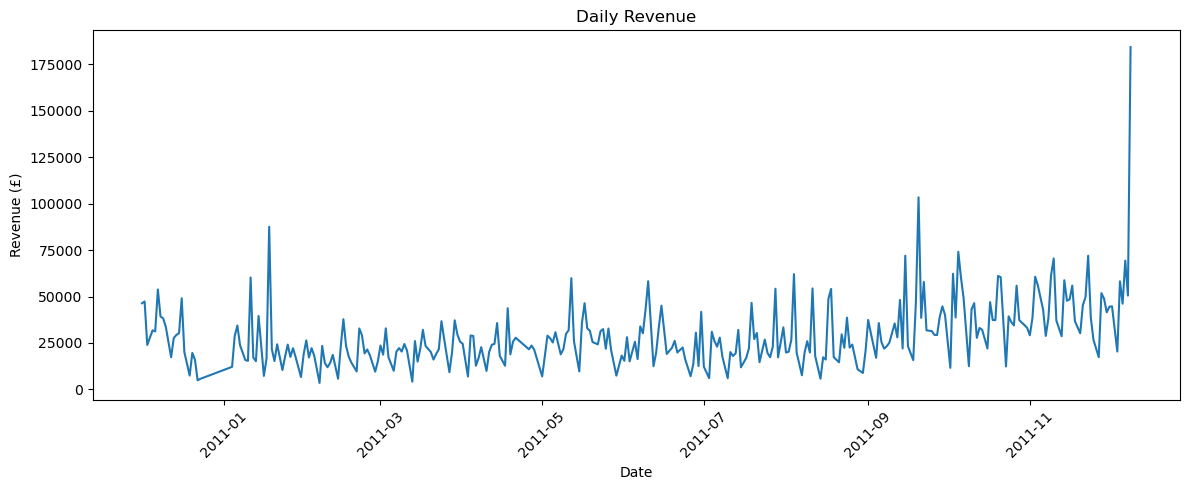

In [68]:
#  Step 9: Revenue per day
daily_revenue = df.groupby('invoice_date')['revenue'].sum().reset_index()

# Plot daily revenue
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.plot(daily_revenue['invoice_date'], daily_revenue['revenue'])
plt.title('Daily Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue (£)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


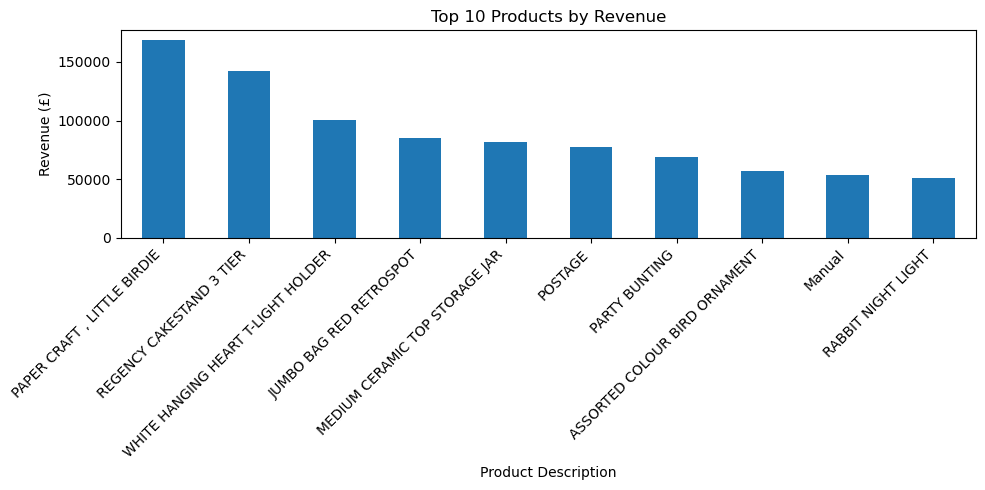

In [70]:
#  Step 10: Top 10 products by total revenue
top_products = df.groupby('description')['revenue'].sum().sort_values(ascending=False).head(10)

# Barplot
top_products.plot(kind='bar', figsize=(10, 5), title='Top 10 Products by Revenue')
plt.ylabel('Revenue (£)')
plt.xlabel('Product Description')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


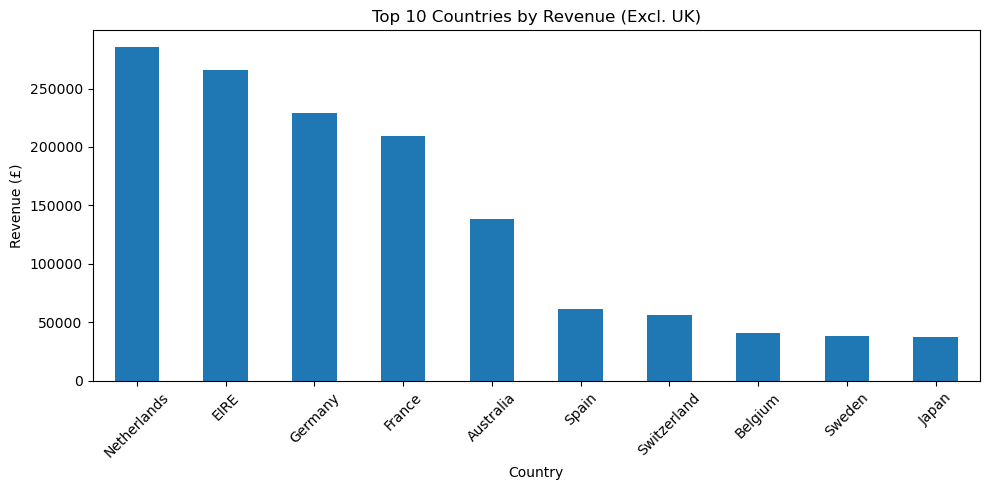

In [76]:
# Step 11: Total revenue by country (excluding UK to see others better)
country_revenue = df.groupby('country')['revenue'].sum().sort_values(ascending=False)

# Plot top 10 countries (excluding UK if desired)
top_countries = country_revenue.drop('United Kingdom', errors='ignore').head(10)

top_countries.plot(kind='bar', figsize=(10, 5), title='Top 10 Countries by Revenue (Excl. UK)')
plt.ylabel('Revenue (£)')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


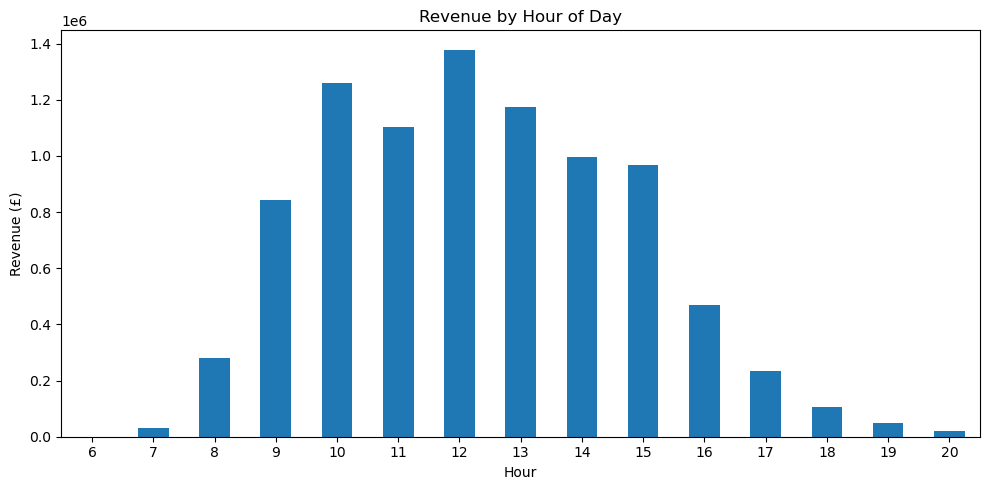

In [78]:
# Step 12: Revenue by hour
hourly_revenue = df.groupby('invoice_hour')['revenue'].sum()

# Plot
hourly_revenue.plot(kind='bar', figsize=(10, 5), title='Revenue by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Revenue (£)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


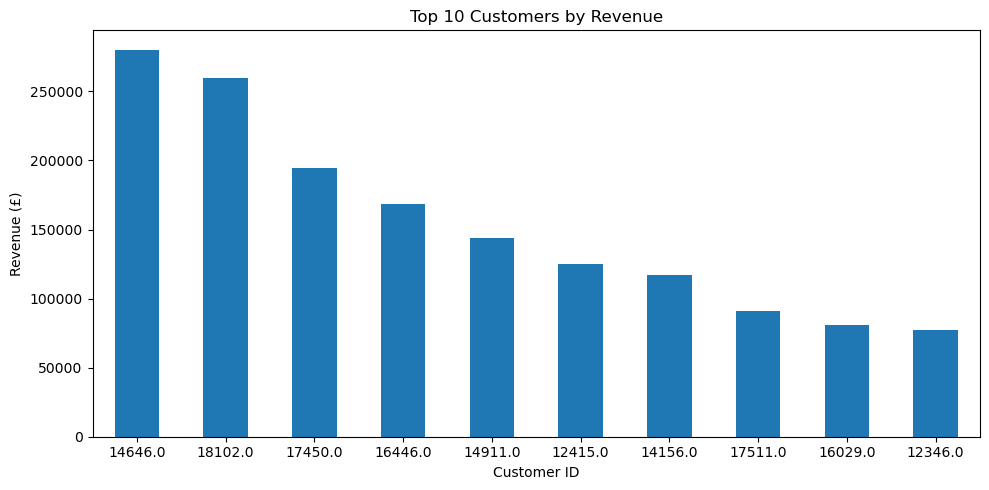

In [82]:
# Step 13: Top 10 customers by total revenue
top_customers = df.groupby('customerid')['revenue'].sum().sort_values(ascending=False).head(10)

top_customers.plot(kind='bar', figsize=(10, 5), title='Top 10 Customers by Revenue')
plt.ylabel('Revenue (£)')
plt.xlabel('Customer ID')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [85]:
# 🏆 Top 5 products by total revenue
top_products = df.groupby('description')['revenue'].sum().sort_values(ascending=False).head(5)
top_products


description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142592.95
WHITE HANGING HEART T-LIGHT HOLDER    100448.15
JUMBO BAG RED RETROSPOT                85220.78
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
Name: revenue, dtype: float64

# 📈 Business Insights & Recommendations

## Key Findings

- **Revenue Concentration:** A small number of products and customers generate a majority of revenue.
- **Top Products:** Products like "PAPER CRAFT , LITTLE BIRDIE", "WHITE HANGING HEART T-LIGHT HOLDER" and "REGENCY CAKESTAND 3 TIER" dominate in terms of total sales.
- **Time Trends:** Sales peak late morning and early afternoon (10AM–3PM).
- **Top Countries:** UK leads in sales volume, followed by Netherlands and Germany.
- **Customer Distribution:** Many transactions lack customer IDs (anonymous purchases).

## Recommendations

1. **Loyalty Program**: Focus on top customers to retain and upsell.
2. **Promotions During Peak Hours**: Run email campaigns or flash sales between 10AM–3PM.
3. **Expand in High-Growth Countries**: Target NL and DE with localized marketing.
4. **Product Strategy**: Invest in promoting best-selling products in underperforming countries.
